## Advanced Regression Assignment

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price.

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

__Business Goal__ 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Reading & Understanding the data

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
house = pd.read_csv(r"C:\Users\Varun\Desktop\python\Advanced Regression\Assignment\train.csv")
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
house.shape

(1460, 81)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Data Cleaning

In [5]:
#inspecting null values in columns
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [6]:
#dropping the columns having more than 80% null values
house = house.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis =1)

__Analyzing columns that have few null values__

In [7]:
#LotFrontage
house['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

We can replace null values with 0

In [8]:
#replace nulls with zero
house['LotFrontage'] = house['LotFrontage'].replace(np.nan, 0)


In [9]:
#MasVnrType
house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

We can replace null value in above column with none

In [10]:
house['MasVnrType'] = house['MasVnrType'].replace(np.nan, 'None')

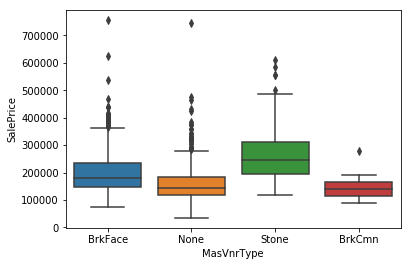

In [11]:
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = house)


In [12]:
#MasVnrArea
house['MasVnrArea'].value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64

We can rpelace null values with 0

In [13]:
#replace nulls with zero
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan, 0)

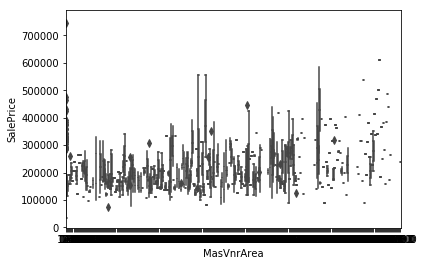

In [14]:
sns.boxplot(x = 'MasVnrArea', y = 'SalePrice', data = house)

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [16]:
#BsmtQual
house['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

Replace nulls with No Basement and also we can reduce the levels in this column by combining EX and FA into some other category like Others

In [17]:
#replacing nulls
house['BsmtQual'] = house['BsmtQual'].replace(np.nan, 'No Basement')

In [18]:
#reducing levels
house['BsmtQual'] = house['BsmtQual'].replace(['Ex', 'Fa', 'No Basement'], 'Others')

In [19]:
house['BsmtQual'].value_counts()

TA        649
Gd        618
Others    193
Name: BsmtQual, dtype: int64

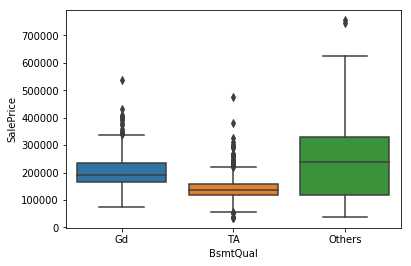

In [20]:
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house)

From above, we can see that BsmtQual does affect the sale price of house

In [21]:
#BsmtCond
house['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

Replace nulls with No Basement

In [22]:
house['BsmtCond'] = house['BsmtCond'].replace(np.nan, 'No Basement')

In [23]:
house['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

More than 90% of the values in this column is TA and hence dosnt add much variance ot the data and can be dropped.

In [24]:
house = house.drop('BsmtCond', axis =1)

In [25]:
#BsmtExposure
house['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

We can replace nulls with No Basement

In [26]:
#replacing nulls
house['BsmtExposure'] = house['BsmtExposure'].replace(np.nan, 'No Basement')

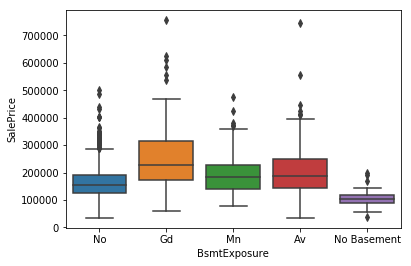

In [27]:
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house)

From above, we can see that type of BsmtExposure does influence sale price of house

In [28]:
#BsmtFinType1
house['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

We can replace nulls with No Basement

In [29]:
#replacing nulls
house['BsmtFinType1'] = house['BsmtFinType1'].replace(np.nan, 'No Basement')

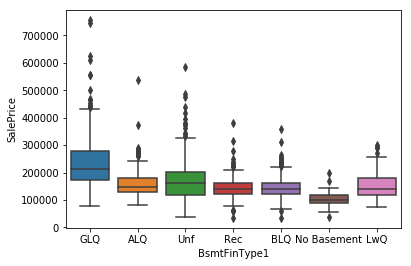

In [30]:
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = house)

From above we can see that the types of BsmtFinType1 does not really affect the sale price of house and hence can be dropped

In [31]:
house = house.drop('BsmtFinType1', axis =1)

In [32]:
#BsmtFinType2
house['BsmtFinType2'].value_counts()


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

The above column again is not adding much to the variance of the data and hence can be dropped

In [33]:
house = house.drop('BsmtFinType2', axis =1)

In [34]:
#Electrical
house['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

The above column again is not adding much to the variance of the data and hence can be dropped

In [35]:
house = house.drop('Electrical', axis =1)

In [36]:
#FireplaceQu
house['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

We can replace nulls with No Fireplace and can also reduce levels in this columns

In [37]:
#replacing nulls
house['FireplaceQu'] = house['FireplaceQu'].replace(np.nan, 'No Fireplace')

In [38]:
#reducing levels
house['FireplaceQu'] = house['FireplaceQu'].replace(['Fa', 'Ex', 'Po', 'Gd', 'TA'], 'Yes Fireplace')

In [39]:
house['FireplaceQu'].value_counts()

Yes Fireplace    770
No Fireplace     690
Name: FireplaceQu, dtype: int64

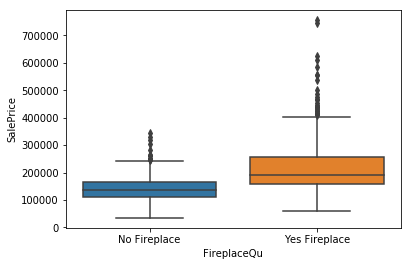

In [40]:
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = house)

From above we can see that house with fireplaces are priced higher than those without a fireplace

In [41]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [42]:
#GarageType
house['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Replace nulls with No Garage

In [43]:
#replacing nulls
house['GarageType'] = house['GarageType'].replace(np.nan, 'No Garage')

In [44]:
#reducing levels
house['GarageType'] = house['GarageType'].replace(['BuiltIn', 'Basment', 'CarPort', '2Types'], 'Others')

In [45]:
house['GarageType'].value_counts()

Attchd       870
Detchd       387
Others       122
No Garage     81
Name: GarageType, dtype: int64

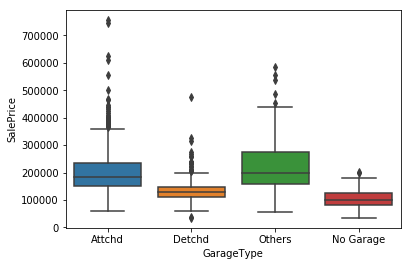

In [46]:
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = house)

Garage types does affect the sale price of the house

In [47]:
#GarageFinish
house['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

We can replace null with No Garage

In [48]:
#replacing nulls
house['GarageFinish'] = house['GarageFinish'].replace(np.nan, 'No Garage')

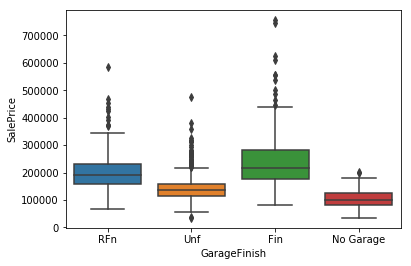

In [49]:
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = house)

In [50]:
#GarageQual
house['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

This column can be droppped as it doesnt explain much variance in the data

In [51]:
house = house.drop('GarageQual', axis = 1)

In [52]:
#GarageCond
house['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

This column can be droppped as it doesnt explain much variance in the data

In [53]:
house = house.drop('GarageCond', axis = 1)

In [54]:
#GarageYrBlt & YearBuilt

house_1 = house[['YearBuilt', 'GarageYrBlt']]
house_1.head(20)

YearBuilt  GarageYrBlt
0        2003       2003.0
1        1976       1976.0
2        2001       2001.0
3        1915       1998.0
4        2000       2000.0
5        1993       1993.0
6        2004       2004.0
7        1973       1973.0
8        1931       1931.0
9        1939       1939.0
10       1965       1965.0
11       2005       2005.0
12       1962       1962.0
13       2006       2006.0
14       1960       1960.0
15       1929       1991.0
16       1970       1970.0
17       1967       1967.0
18       2004       2004.0
19       1958       1958.0

GarageYrBlt can be dropped as it is same YearBuilt

In [55]:
house = house.drop('GarageYrBlt', axis = 1)

__We have treated all the columns with one or more null values above__

__Lets now try and analyze other important features__

In [56]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [57]:
#analyzing various features for basement
house_base=house[['BsmtQual','BsmtExposure',
                          'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
house_base.head()

BsmtQual BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
0       Gd           No         706           0        150          856
1       Gd           Gd         978           0        284         1262
2       Gd           Mn         486           0        434          920
3       TA           No         216           0        540          756
4       Gd           Av         655           0        490         1145

<Figure size 1440x720 with 0 Axes>

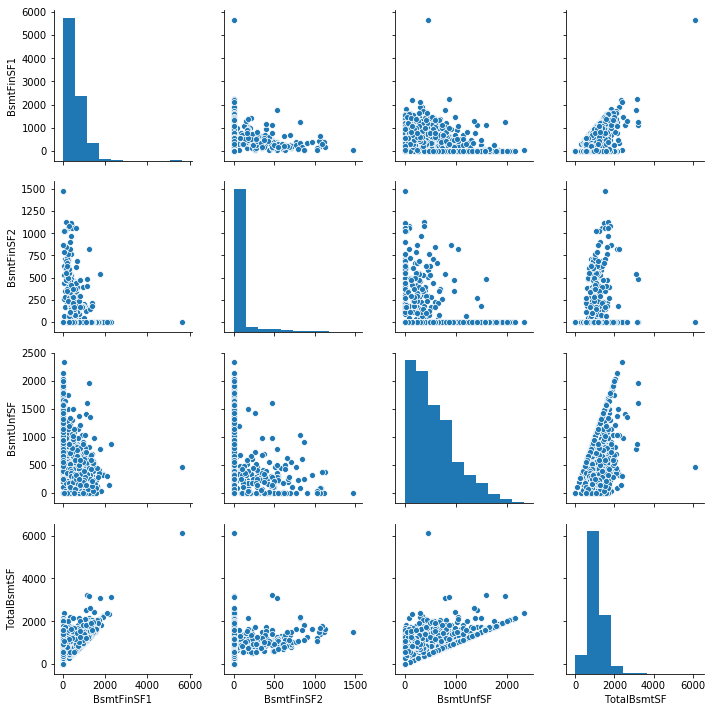

In [58]:
plt.figure(figsize=(20, 10))
sns.pairplot(house_base)
plt.show()

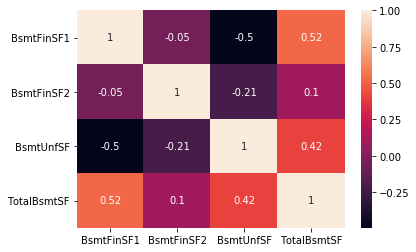

In [59]:
sns.heatmap(house_base.corr(), annot = True)

From above, we can see that TotalBsmntSF is highly correlated with BsmntFinSF1 and BsmntUnfSF and hence these two variables can be dropped.

In [60]:
house = house.drop(['BsmtFinSF1', 'BsmtUnfSF'], axis = 1)

In [61]:
#analyzing various features for porch
house_porch = house[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']]
house_porch.head()

OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
0           61              0          0            0
1            0              0          0            0
2           42              0          0            0
3           35            272          0            0
4           84              0          0            0

<Figure size 1440x720 with 0 Axes>

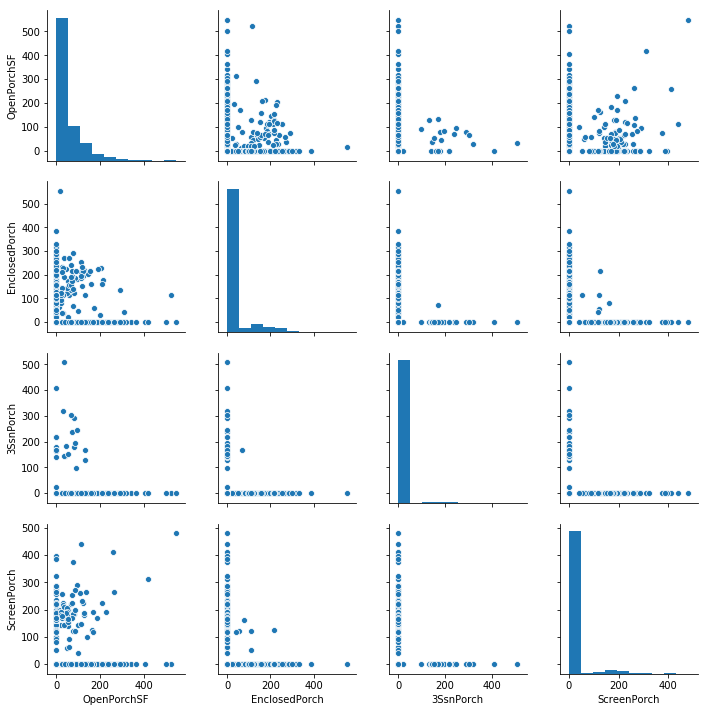

In [62]:
plt.figure(figsize=(20, 10))
sns.pairplot(house_porch)
plt.show()

From the above pairplot, we can see that OpenPorch and EclosedPorch captures most of the information on all the variables for Porch. hence others can be dropped

In [63]:
house = house.drop(['3SsnPorch', 'ScreenPorch'], axis = 1)

In [64]:
#YearBuilt
print(house['YearBuilt'].min())
print(house['YearBuilt'].max())


1872
2010


YearBuilt can be binned into discrete categories

In [65]:
#binning the YearBuilt into discrete categories
def year(n):
    if n < 1925:
        return 'Very Old'
    elif n >=1925 and n < 1975:
        return 'Old'
    elif n >= 1975 and n < 2000:
        return 'medium'
    else:
        return 'new'
        
house['YearBuilt'] = house['YearBuilt'].apply(lambda x: year(x))

In [66]:
#converting to object type
house['YearBuilt'] = house['YearBuilt'].values.astype(np.object)

In [67]:
house['YearBuilt'].value_counts()

Old         604
new         388
medium      322
Very Old    146
Name: YearBuilt, dtype: int64

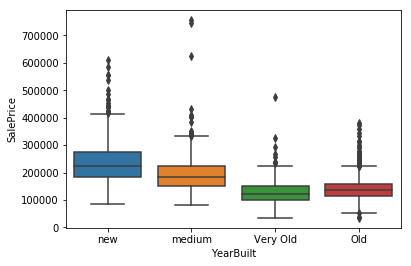

In [68]:
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = house)

From above, we can see that newere houses are priced higher than the old ones.

In [69]:
#YearRemodAdd
print(house['YearRemodAdd'].min())
print(house['YearRemodAdd'].max())

1950
2010


In [70]:
#binning the YearRemodAdd into discrete categories
def ryear(n):
    if n < 1975:
        return 'Very Old'
    elif n >=1975 and n < 1985:
        return 'Old'
    elif n >= 1985 and n < 2000:
        return 'medium'
    else:
        return 'new'
        
house['YearRemodAdd'] = house['YearRemodAdd'].apply(lambda x: ryear(x))

In [71]:
#converting to object type
house['YearRemodAdd'] = house['YearRemodAdd'].values.astype(np.object)

In [72]:
house['YearRemodAdd'].value_counts()

new         552
Very Old    489
medium      289
Old         130
Name: YearRemodAdd, dtype: int64

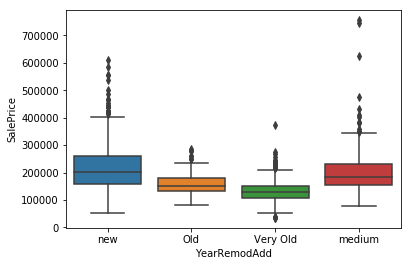

In [73]:
sns.boxplot(x = 'YearRemodAdd', y = 'SalePrice', data = house)

From above, we can that the houses which are remodelled recently are priced higher

In [74]:
#MSZoning
house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [75]:
#Neighborhood
house['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

We can reduce the levels for this column by replacing the entries that have less than 40 values with something like others

In [76]:
house['Neighborhood'] = house['Neighborhood'].replace(['Timber', 'IDOTRR', 'ClearCr', 'SWISU', 'StoneBr', 
                                                       'Blmngtn', 'MeadowV', 'BrDale', 'Veenker', 'NPkVill',
                                                      'Blueste'], 'Others')

In [77]:
#Condition1
house['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [78]:
#reducing levels
house['Condition1'] = house['Condition1'].replace(['RRAn', 'PosN', 'RRAe', 'PosA', 'RRRn', 
                                                       'RRNe'], 'Others')

In [79]:
#Condition2
house['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

Condition2 can be dropped as it doesnt contriute to variance in the data

In [80]:
house = house.drop('Condition2', axis =1)

In [81]:
#BldgType
house['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [82]:
#Exterior1st
house['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [83]:
#reducing levels
house['Exterior1st'] = house['Exterior1st'].replace(['BrkFace', 'WdShing', 'Stucco', 'AsbShng', 'BrkComm', 
                                                       'Stone', 'CBlock', 'AsphShn', 'ImStucc'], 'Others')

In [84]:
#Exterior2nd
house['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

Most of the values are same as Exterior1st and hence this can be dropped

In [85]:
house = house.drop('Exterior2nd', axis =1)

In [86]:
#YrSold
print(house.YrSold.min())
print(house.YrSold.max())

2006
2010


No binning required

In [87]:
#checking null values again
round(100*(house.isnull().sum()/len(house.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinSF2       0.0
                ... 
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish 

In [88]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 n

In [89]:
house.shape

(1460, 64)

### Pairplot and heatmap to understand correlations

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable.

In [90]:
## all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   

   BsmtFinSF2  TotalBsmtSF  1stFlrSF    ...      GarageCars  GarageArea  \
0           0          856       856    ...               2         548   
1           0         1262      1262    ...               2         460   
2           0          920       920    ...               2         608   
3           0          756       961    ...               3         642   
4           0         1145      1145    ...               3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea  MiscVal  MoSold  YrSold  \
0           0           61              0         0        0       2    2008   
1         298            0              0         0        0       5    2007   
2           0           42              0         0        0       9    2008   
3           0           35            272         0        0       2    2006   
4         192           84              0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 31 columns]

In [91]:
#droppping Id
house_numeric = house_numeric.drop('Id', axis =1)

<Figure size 1440x720 with 0 Axes>

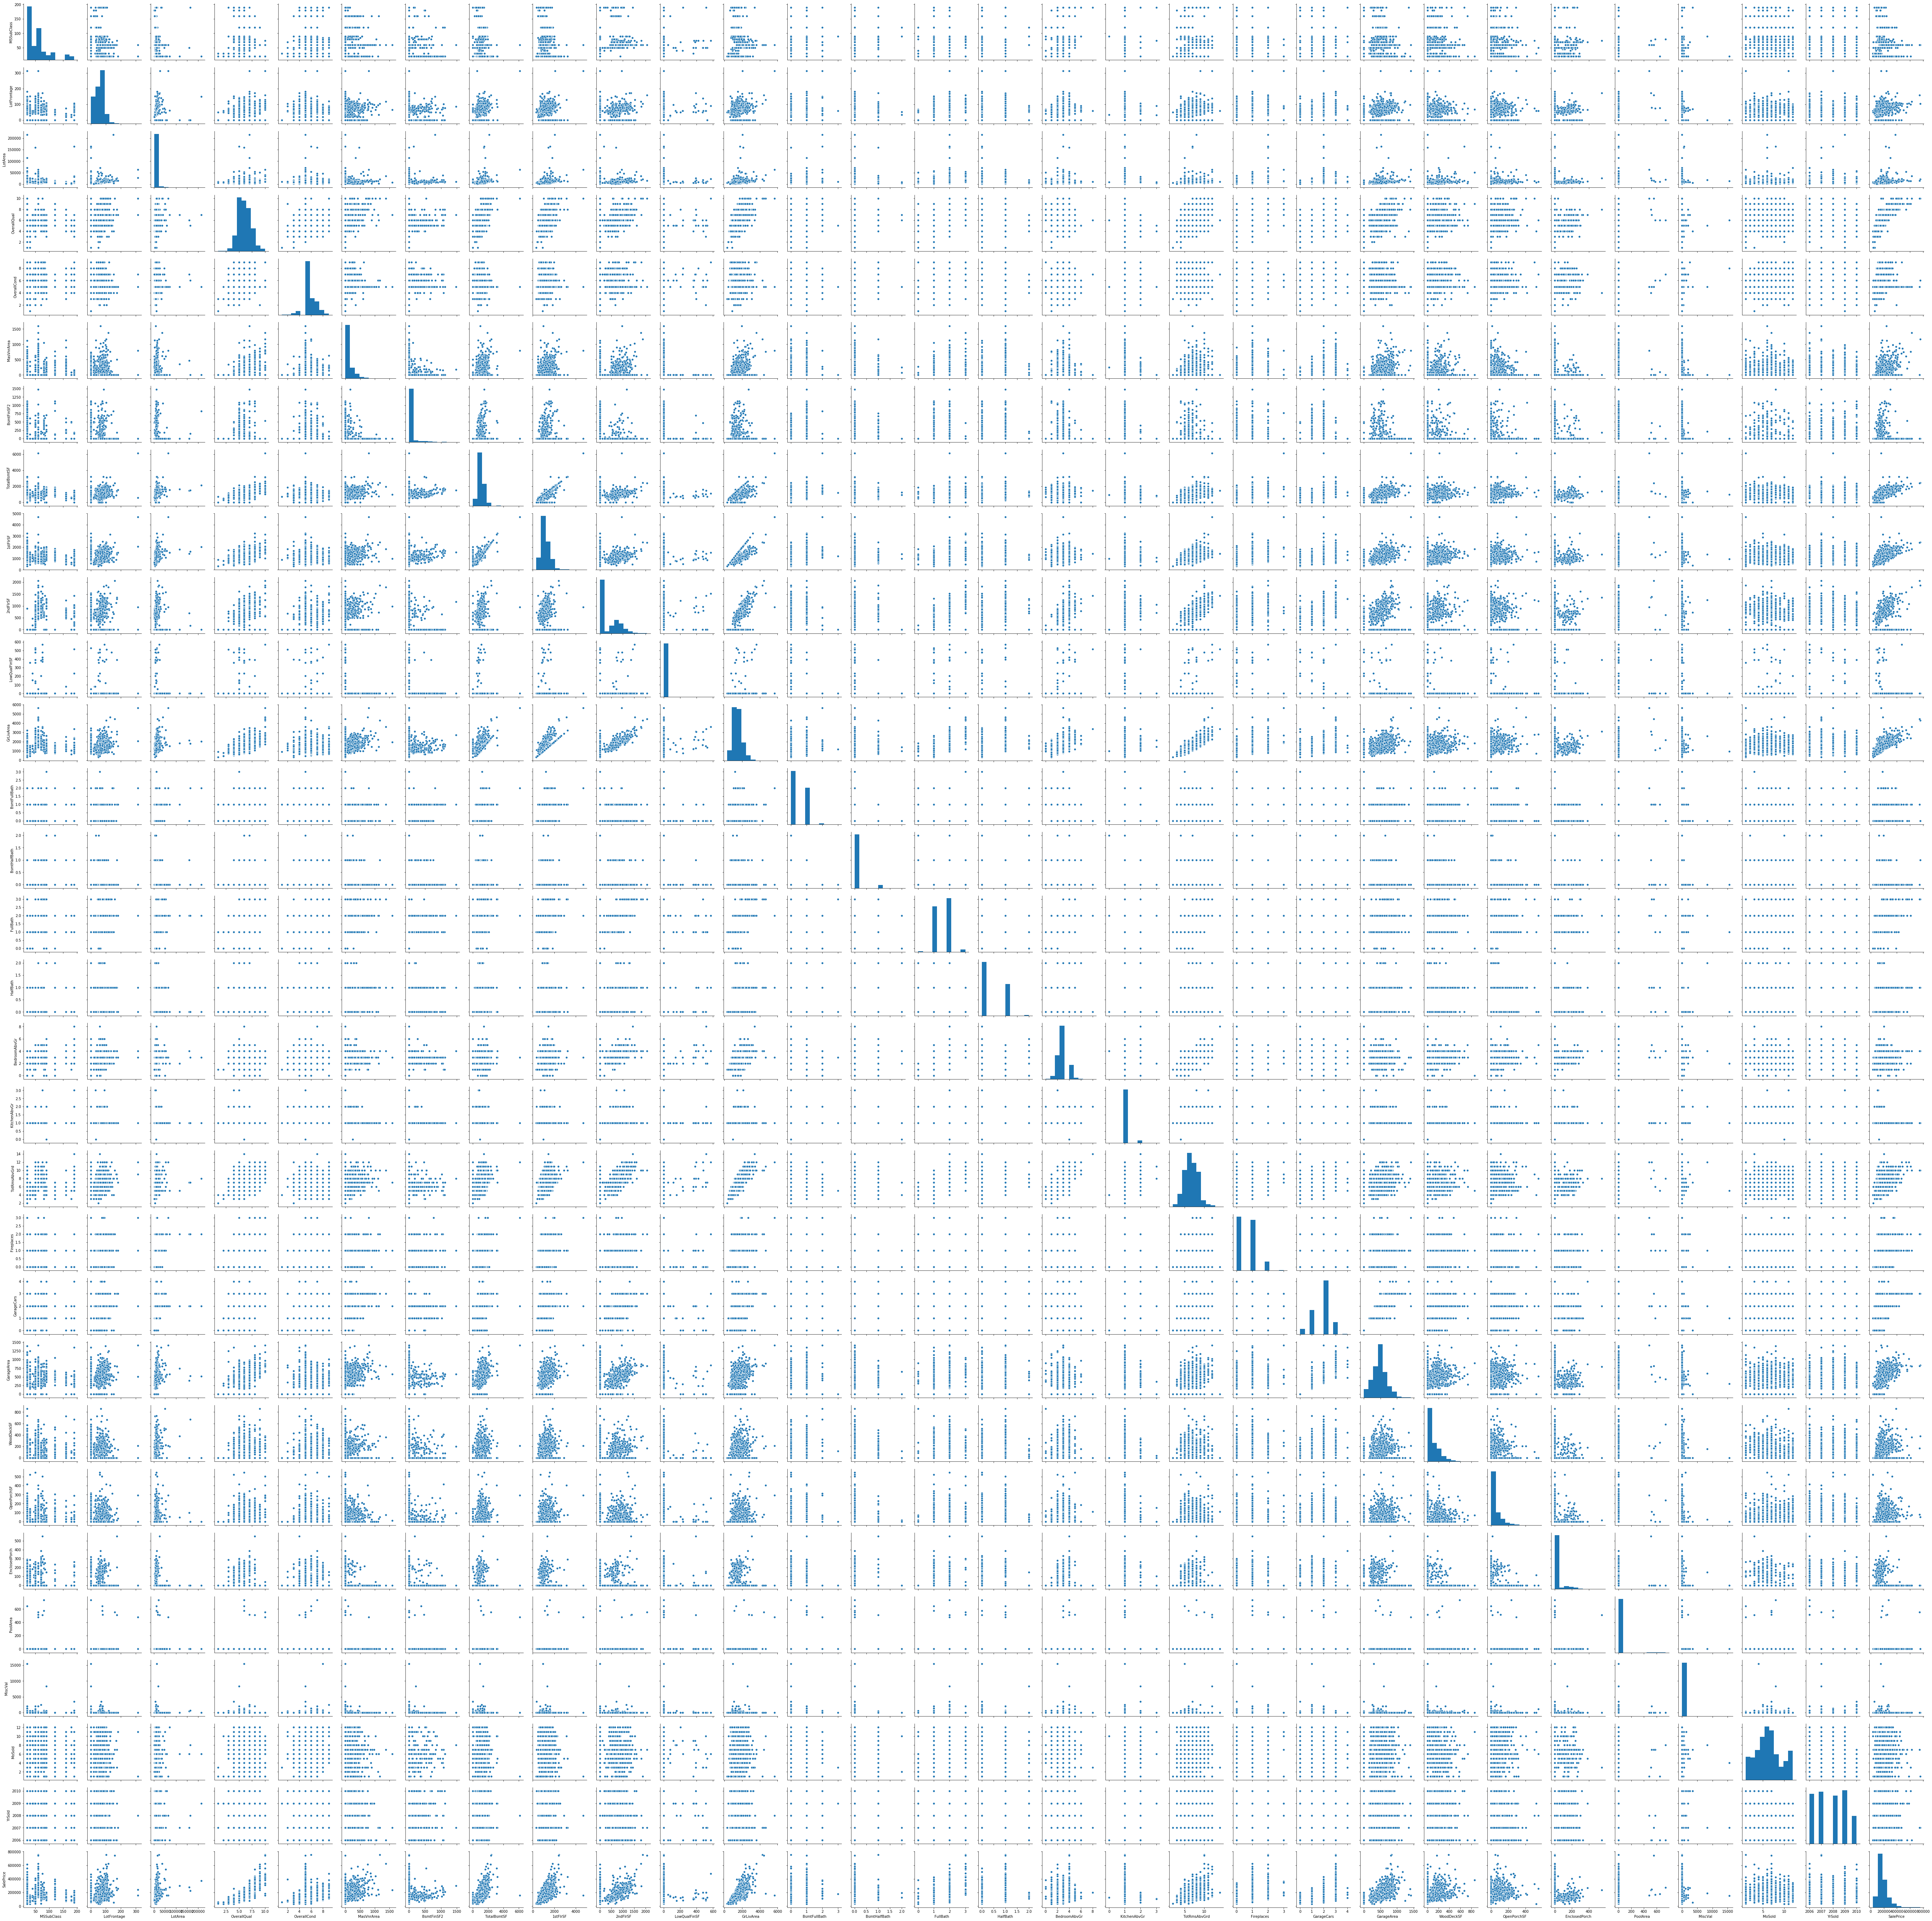

In [92]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(house_numeric)
plt.show()

From above, we can see that there are variables which are linearly related however it is diffcult to read. Lets now have a look at heatmap to understand correlations better

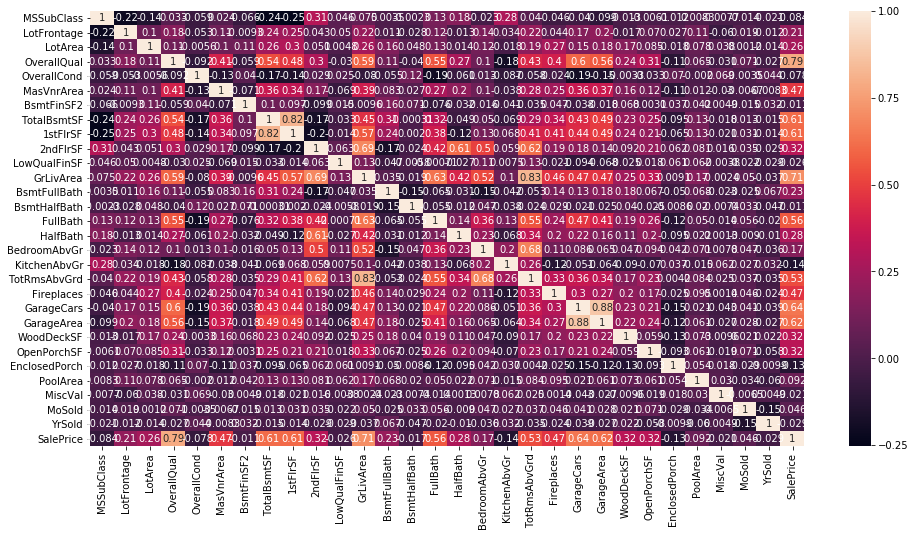

In [93]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))
sns.heatmap(house_numeric.corr(), annot = True)

From above heatmap, we can see that variables such as OverallQual, GrLivArea,FullBath, GarageCars, GarageArea etc are strongly and positively correlated with SalePrice.

Whereas there are other variables such as KitchenAbvGr, EnclosedPorch which are negativey correlated with Saleprice

We can also see that there are certain independent variables such as TotRmsAbvGRd and GrLivArea, GarageArea and GarageCars which are strongly and positively correlated and we will need to take care of this in our model building

__Analysing other columns to check their distribution__

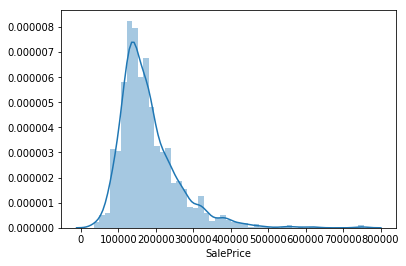

In [94]:
sns.distplot(house['SalePrice'])
plt.show()

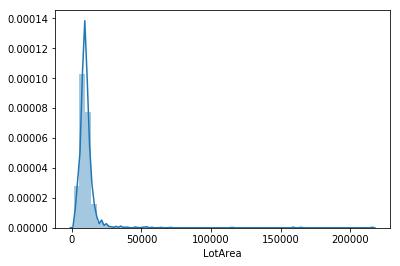

In [95]:
sns.distplot(house['LotArea'])
plt.show()

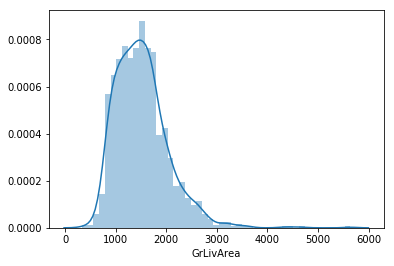

In [96]:
sns.distplot(house['GrLivArea'])
plt.show()

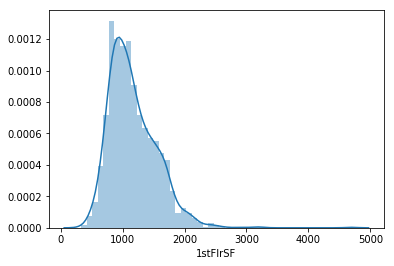

In [97]:
sns.distplot(house['1stFlrSF'])
plt.show()

## Data Preparation for Modelling

In [98]:
#Split into X and y

X = house.drop(['Id', 'SalePrice'], axis = 1)
y = house['SalePrice']

In [99]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 BldgType      ...      HeatingQC CentralAir  \
0      CollgCr       Norm     1Fam      ...             Ex          Y   
1       Others      Feedr     1Fam      ...             Ex          Y   
2      CollgCr       Norm     1Fam      ...             Ex          Y   
3      Crawfor       Norm     1Fam      ...             Gd          Y   
4      NoRidge       Norm     1Fam      ...             Ex          Y   

  KitchenQual Functional    FireplaceQu GarageType GarageFinish PavedDrive  \
0          Gd        Typ   No Fireplace     Attchd          RFn          Y   
1          TA        Typ  Yes Fireplace     Attchd          RFn          Y   
2          Gd        Typ  Yes Fireplace     Attchd          RFn          Y   
3          Gd        Typ  Yes Fireplace     Detchd          Unf          Y   
4          Gd        Typ  Yes Fireplace     Attchd          RFn          Y   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal  

[5 rows x 33 columns]

In [100]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

           ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0          ...                         0               0             0   
1          ...                         0               0             0   
2          ...                         0               0             0   
3          ...                         0               0             0   
4          ...                         0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 133 columns]

In [101]:
# drop original categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [102]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [103]:
X.shape

(1460, 162)

In [104]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=162)

In [105]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building & Evaluation

__Lasso regression__
This will also be used to reduce the number of features of our model

In [106]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

#cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   25.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [107]:
#checking results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.334208      0.097292         0.001597        0.000793      0.0001   
1       0.235967      0.008958         0.001802        0.000400       0.001   
2       0.240370      0.037054         0.001201        0.000400        0.01   
3       0.211549      0.042654         0.001805        0.000402        0.05   
4       0.198744      0.039348         0.001398        0.000486         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -18572.240383      -21054.373028      -20549.922300   
1   {'alpha': 0.001}      -18572.228674      -21054.298214      -20549.919252   
2    {'alpha': 0.01}      -18572.111611      -21053.632005      -20549.893256   
3    {'alpha': 0.05}      -18571.591445      -21051.254899      -20549.775723   
4     {'alpha': 0.1}      -18570.941390      -21048.422825      -20549.627118   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -20802.050200       ...           -19817.144779     1224.015117   
1      -20802.008937       ...           -19817.117069     1223.997568   
2      -20801.596301       ...           -19816.857241     1223.839169   
3      -20799.747695       ...           -19815.815864     1223.250591   
4      -20797.441000       ...           -19814.542494     1222.543891   

   rank_test_score  split0_train_score  split1_train_score  \
0               28       -14235.850610       -13710.829477   
1               27       -14235.848351       -13710.828252   
2               26       -14235.825730       -13710.816135   
3               25       -14235.725285       -13710.762495   
4               24       -14235.599845       -13710.695838   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13431.486065       -14416.780240       -14403.636949   
1       -13431.486010       -14416.777914       -14403.636438   
2       -13431.484081       -14416.761198       -14403.631325   
3       -13431.476252       -14416.685755       -14403.609044   
4       -13431.467154       -14416.593112       -14403.581220   

   mean_train_score  std_train_score  
0     -14039.716668       397.792580  
1     -14039.715393       397.792042  
2     -14039.703694       397.788300  
3     -14039.651766       397.771282  
4     -14039.587434       397.750067  

[5 rows x 21 columns]

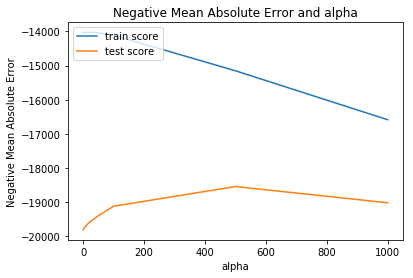

In [108]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [109]:
model_cv.best_params_

{'alpha': 500}

from the plot as well as the best_params value, we can see that the optimum value of lambda for Lasso regression is 500

In [110]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
#Extracting the coefficients and model equation from lasso regression
lasso.coef_

array([-4.92617210e+03, -0.00000000e+00,  2.73676931e+03,  1.47521887e+04,
        4.61855958e+03,  2.35637622e+03,  0.00000000e+00,  4.02464848e+03,
        0.00000000e+00,  1.74628057e+02, -1.97312217e+03,  2.68073107e+04,
        5.71193455e+03,  4.68548658e+02,  2.13704756e+03,  1.61954138e+02,
       -0.00000000e+00, -3.25767827e+03,  0.00000000e+00,  2.17786956e+03,
        6.39571194e+03,  5.08170134e+02,  6.14347696e+02,  0.00000000e+00,
       -0.00000000e+00,  2.54165285e+02, -0.00000000e+00, -3.49482262e+02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.28534645e+03,
       -1.74001787e+02,  9.49172687e+02,  3.41748332e+02, -1.12073069e+03,
        0.00000000e+00,  2.06837155e+03,  1.46481484e+03,  3.70320583e+03,
       -6.53539025e+02,  2.76035564e+03, -7.00557513e+02, -3.52275212e+02,
        0.00000000e+00,  8.05019737e+02,  0.00000000e+00,  0.00000000e+00,
        3.55794108e+03, -3.99335742e+03, -0.00000000e+00, -1.12985481e+03,
       -1.38098821e+03, -

In [112]:
# lasso model parameters generation
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 1) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print(list(zip(cols, model_parameters)))

[('constant', 180380.6), ('MSSubClass', -4926.2), ('LotFrontage', -0.0), ('LotArea', 2736.8), ('OverallQual', 14752.2), ('OverallCond', 4618.6), ('MasVnrArea', 2356.4), ('BsmtFinSF2', 0.0), ('TotalBsmtSF', 4024.6), ('1stFlrSF', 0.0), ('2ndFlrSF', 174.6), ('LowQualFinSF', -1973.1), ('GrLivArea', 26807.3), ('BsmtFullBath', 5711.9), ('BsmtHalfBath', 468.5), ('FullBath', 2137.0), ('HalfBath', 162.0), ('BedroomAbvGr', -0.0), ('KitchenAbvGr', -3257.7), ('TotRmsAbvGrd', 0.0), ('Fireplaces', 2177.9), ('GarageCars', 6395.7), ('GarageArea', 508.2), ('WoodDeckSF', 614.3), ('OpenPorchSF', 0.0), ('EnclosedPorch', -0.0), ('PoolArea', 254.2), ('MiscVal', -0.0), ('MoSold', -349.5), ('YrSold', -0.0), ('MSZoning_FV', 0.0), ('MSZoning_RH', 0.0), ('MSZoning_RL', 2285.3), ('MSZoning_RM', -174.0), ('Street_Pave', 949.2), ('LotShape_IR2', 341.7), ('LotShape_IR3', -1120.7), ('LotShape_Reg', 0.0), ('LandContour_HLS', 2068.4), ('LandContour_Low', 1464.8), ('LandContour_Lvl', 3703.2), ('Utilities_NoSeWa', -653.5

In [113]:
[('constant', 180380.6), ('MSSubClass', -4926.2), ('LotFrontage', -0.0), ('LotArea', 2736.8), ('OverallQual', 14752.2), ('OverallCond', 4618.6), ('MasVnrArea', 2356.4), ('BsmtFinSF2', 0.0), ('TotalBsmtSF', 4024.6), ('1stFlrSF', 0.0), ('2ndFlrSF', 174.6), ('LowQualFinSF', -1973.1), ('GrLivArea', 26807.3), ('BsmtFullBath', 5711.9), ('BsmtHalfBath', 468.5), ('FullBath', 2137.0), ('HalfBath', 162.0), ('BedroomAbvGr', -0.0), ('KitchenAbvGr', -3257.7), ('TotRmsAbvGrd', 0.0), ('Fireplaces', 2177.9), ('GarageCars', 6395.7), ('GarageArea', 508.2), ('WoodDeckSF', 614.3), ('OpenPorchSF', 0.0), ('EnclosedPorch', -0.0), ('PoolArea', 254.2), ('MiscVal', -0.0), ('MoSold', -349.5), ('YrSold', -0.0), ('MSZoning_FV', 0.0), ('MSZoning_RH', 0.0), ('MSZoning_RL', 2285.3), ('MSZoning_RM', -174.0), ('Street_Pave', 949.2), ('LotShape_IR2', 341.7), ('LotShape_IR3', -1120.7), ('LotShape_Reg', 0.0), ('LandContour_HLS', 2068.4), ('LandContour_Low', 1464.8), ('LandContour_Lvl', 3703.2), ('Utilities_NoSeWa', -653.5), ('LotConfig_CulDSac', 2760.4), ('LotConfig_FR2', -700.6), ('LotConfig_FR3', -352.3), ('LotConfig_Inside', 0.0), ('LandSlope_Mod', 805.0), ('LandSlope_Sev', 0.0), ('Neighborhood_CollgCr', 0.0), ('Neighborhood_Crawfor', 3557.9), ('Neighborhood_Edwards', -3993.4), ('Neighborhood_Gilbert', -0.0), ('Neighborhood_Mitchel', -1129.9), ('Neighborhood_NAmes', -1381.0), ('Neighborhood_NWAmes', -0.0), ('Neighborhood_NoRidge', 7732.2), ('Neighborhood_NridgHt', 6857.7), ('Neighborhood_OldTown', -1291.5), ('Neighborhood_Others', 793.3), ('Neighborhood_Sawyer', -371.0), ('Neighborhood_SawyerW', 0.0), ('Neighborhood_Somerst', 5004.7), ('Condition1_Feedr', -9.3), ('Condition1_Norm', 4143.9), ('Condition1_Others', 0.0), ('Condition1_RRNn', -0.0), ('BldgType_2fmCon', 0.0), ('BldgType_Duplex', -0.0), ('BldgType_Twnhs', -949.6), ('BldgType_TwnhsE', -0.0), ('HouseStyle_1.5Unf', 0.0), ('HouseStyle_1Story', 1856.0), ('HouseStyle_2.5Fin', -0.0), ('HouseStyle_2.5Unf', -0.0), ('HouseStyle_2Story', -0.0), ('HouseStyle_SFoyer', 0.0), ('HouseStyle_SLvl', -0.0), ('YearBuilt_Very Old', -4049.8), ('YearBuilt_medium', 0.0), ('YearBuilt_new', 0.0), ('YearRemodAdd_Very Old', -1133.2), ('YearRemodAdd_medium', 584.7), ('YearRemodAdd_new', 1217.5), ('RoofStyle_Gable', -350.7), ('RoofStyle_Gambrel', 0.0), ('RoofStyle_Hip', 0.0), ('RoofStyle_Mansard', 0.0), ('RoofStyle_Shed', 338.1), ('RoofMatl_CompShg', 24383.9), ('RoofMatl_Membran', 4677.3), ('RoofMatl_Metal', 4501.3), ('RoofMatl_Roll', 4520.0), ('RoofMatl_Tar&Grv', 14473.7), ('RoofMatl_WdShake', 10152.4), ('RoofMatl_WdShngl', 16502.5), ('Exterior1st_HdBoard', -0.0), ('Exterior1st_MetalSd', 0.0), ('Exterior1st_Others', 0.0), ('Exterior1st_Plywood', -642.9), ('Exterior1st_VinylSd', 1285.9), ('Exterior1st_Wd Sdng', -422.8), ('MasVnrType_BrkFace', -0.0), ('MasVnrType_None', 1571.6), ('MasVnrType_Stone', -0.0), ('ExterQual_Fa', -0.0), ('ExterQual_Gd', -0.0), ('ExterQual_TA', -2204.0), ('ExterCond_Fa', -34.1), ('ExterCond_Gd', -0.0), ('ExterCond_Po', 0.0), ('ExterCond_TA', 0.0), ('Foundation_CBlock', 0.0), ('Foundation_PConc', 662.5), ('Foundation_Slab', -254.4), ('Foundation_Stone', -0.0), ('Foundation_Wood', 0.0), ('BsmtQual_Others', 7488.9), ('BsmtQual_TA', 0.0), ('BsmtExposure_Gd', 5187.6), ('BsmtExposure_Mn', -0.0), ('BsmtExposure_No', -3321.6), ('BsmtExposure_No Basement', -2671.3), ('Heating_GasA', -0.0), ('Heating_GasW', 848.0), ('Heating_Grav', 0.0), ('Heating_OthW', -1288.3), ('Heating_Wall', 87.0), ('HeatingQC_Fa', -0.0), ('HeatingQC_Gd', -441.2), ('HeatingQC_Po', -0.0), ('HeatingQC_TA', -835.1), ('CentralAir_Y', 671.6), ('KitchenQual_Fa', -2693.6), ('KitchenQual_Gd', -10360.8), ('KitchenQual_TA', -10440.2), ('Functional_Maj2', -1210.0), ('Functional_Min1', 0.0), ('Functional_Min2', -0.0), ('Functional_Mod', -0.0), ('Functional_Sev', -879.2), ('Functional_Typ', 2230.0), ('FireplaceQu_Yes Fireplace', 0.0), ('GarageType_Detchd', -636.1), ('GarageType_No Garage', 906.6), ('GarageType_Others', -128.3), ('GarageFinish_No Garage', 10.2), ('GarageFinish_RFn', -1927.5), ('GarageFinish_Unf', -2342.9), ('PavedDrive_P', -0.0), ('PavedDrive_Y', 0.0), ('SaleType_CWD', 0.0), ('SaleType_Con', 877.4), ('SaleType_ConLD', 811.8), ('SaleType_ConLI', -0.0), ('SaleType_ConLw', 0.0), ('SaleType_New', 2272.1), ('SaleType_Oth', 0.0), ('SaleType_WD', 0.0), ('SaleCondition_AdjLand', 130.2), ('SaleCondition_Alloca', -0.0), ('SaleCondition_Family', -0.0), ('SaleCondition_Normal', 0.0), ('SaleCondition_Partial', 0.0)]

[('constant', 180380.6),
 ('MSSubClass', -4926.2),
 ('LotFrontage', -0.0),
 ('LotArea', 2736.8),
 ('OverallQual', 14752.2),
 ('OverallCond', 4618.6),
 ('MasVnrArea', 2356.4),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 4024.6),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 174.6),
 ('LowQualFinSF', -1973.1),
 ('GrLivArea', 26807.3),
 ('BsmtFullBath', 5711.9),
 ('BsmtHalfBath', 468.5),
 ('FullBath', 2137.0),
 ('HalfBath', 162.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -3257.7),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 2177.9),
 ('GarageCars', 6395.7),
 ('GarageArea', 508.2),
 ('WoodDeckSF', 614.3),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', -0.0),
 ('PoolArea', 254.2),
 ('MiscVal', -0.0),
 ('MoSold', -349.5),
 ('YrSold', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 2285.3),
 ('MSZoning_RM', -174.0),
 ('Street_Pave', 949.2),
 ('LotShape_IR2', 341.7),
 ('LotShape_IR3', -1120.7),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 2068.4),
 ('LandContour_Low', 1464.8),
 ('LandContour_Lv

From above, we can see that the top variables positively affecting the SalePrice of house according to Lasso Regression are:

- GRLivArea
- RoofMatl
- OverallQual
- GarageCars
- TotalBsmtSF
- BsmtQual_Others
- OverallCond
- BsmtFullBath
- Neighborhood_NoRidge
- Neighborhood_NridgHt
- BsmtExposure_Gd

__Making predictions using Lasso regression__

In [114]:
# making predictions on train set
y_train_pred = lasso.predict(X_train)

# making predictions on test set
y_test_pred = lasso.predict(X_test)




In [115]:
#checking r2 score
from sklearn import metrics
from sklearn.metrics import r2_score

#train set
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#test set
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))



0.8957341880143045
0.8608437788625054


From above, we can see that using Lasso regression we get a r2 score of approx 86% which is fairly good.

In [116]:
# checking RMSE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, y_test_pred))

0.1480699082423164

### Ridge Regression

In [118]:
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [119]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.141761      0.245481         0.003404        0.000800      0.0001   
1       0.011013      0.000633         0.001799        0.000399       0.001   
2       0.008609      0.000798         0.001398        0.000487        0.01   
3       0.007803      0.000753         0.001601        0.000490        0.05   
4       0.007412      0.000499         0.001994        0.000008         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -18572.238549      -20982.917284      -20549.912291   
1   {'alpha': 0.001}      -18572.210352      -20982.895745      -20549.798405   
2    {'alpha': 0.01}      -18571.928621      -20982.680534      -20548.660303   
3    {'alpha': 0.05}      -18570.681581      -20981.727407      -20543.618554   
4     {'alpha': 0.1}      -18569.134051      -20980.543675      -20537.353910   

   split3_test_score       ...         mean_test_score  std_test_score  \
0      -20781.015364       ...           -19798.663110     1206.386601   
1      -20780.404661       ...           -19798.513255     1206.267791   
2      -20774.307664       ...           -19797.016837     1205.083425   
3      -20747.427988       ...           -19790.412140     1199.900686   
4      -20714.316523       ...           -19782.259383     1193.604259   

   rank_test_score  split0_train_score  split1_train_score  \
0               27       -14235.856292       -13710.829424   
1               26       -14235.905125       -13710.828354   
2               25       -14236.392998       -13710.817625   
3               24       -14238.551447       -13710.775843   
4               23       -14241.226982       -13710.725246   

   split2_train_score  split3_train_score  split4_train_score  \
0       -13431.479619       -14416.855411       -14403.641569   
1       -13431.430321       -14416.870120       -14403.683773   
2       -13430.937764       -14417.017554       -14404.105430   
3       -13428.803153       -14417.680196       -14405.971053   
4       -13426.244835       -14419.197363       -14408.283908   

   mean_train_score  std_train_score  
0     -14039.732463       397.810217  
1     -14039.743539       397.840795  
2     -14039.854274       398.146442  
3     -14040.356338       399.487000  
4     -14041.135667       401.254730  

[5 rows x 21 columns]

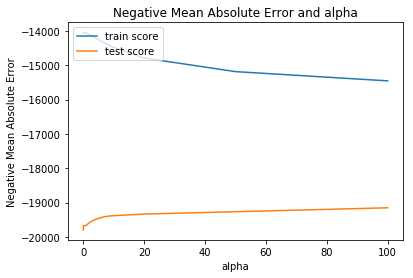

In [120]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From above we can see that after the value of alpha =10, the mean absolute error for test set flats out and hence alpha =10 seems to be a optimal lambda value for ridge regression

In [121]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.09753745e+03, -5.32873854e+02,  2.99170414e+03,  1.25888075e+04,
        5.20279318e+03,  3.34902717e+03, -2.52822809e+02,  6.59094638e+03,
        5.99556472e+03,  1.41511889e+04, -1.46335297e+03,  1.60311511e+04,
        5.49901993e+03,  8.46148522e+02,  2.83035384e+03,  7.57839378e+02,
       -1.35673200e+03, -4.23251463e+03,  1.23749321e+03,  3.64257030e+03,
        5.80413200e+03,  2.27941901e+03,  7.20189615e+02,  2.87599039e+01,
       -3.03793318e+02,  2.99922848e+03, -1.12173718e+02, -7.35416563e+02,
       -1.45844437e+02,  2.67827285e+03,  1.83325712e+03,  7.66365588e+03,
        4.79931212e+03,  1.59881961e+03,  5.94653686e+02, -1.72723544e+02,
        3.61770643e+02,  3.38004996e+03,  1.73701400e+03,  5.78700705e+03,
       -8.26813997e+02,  2.80027705e+03, -1.35363214e+03, -5.47612066e+02,
       -5.11040033e+02,  1.88218681e+03, -2.24243740e+02,  3.75763784e+02,
        4.26151117e+03, -4.92995137e+03, -3.88564038e+01, -2.29309158e+03,
       -3.18242174e+03, -

In [122]:
# ridge model parameters generation
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 1) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
print(list(zip(cols, model_parameters)))

[('constant', 180436.1), ('MSSubClass', -4097.5), ('LotFrontage', -532.9), ('LotArea', 2991.7), ('OverallQual', 12588.8), ('OverallCond', 5202.8), ('MasVnrArea', 3349.0), ('BsmtFinSF2', -252.8), ('TotalBsmtSF', 6590.9), ('1stFlrSF', 5995.6), ('2ndFlrSF', 14151.2), ('LowQualFinSF', -1463.4), ('GrLivArea', 16031.2), ('BsmtFullBath', 5499.0), ('BsmtHalfBath', 846.1), ('FullBath', 2830.4), ('HalfBath', 757.8), ('BedroomAbvGr', -1356.7), ('KitchenAbvGr', -4232.5), ('TotRmsAbvGrd', 1237.5), ('Fireplaces', 3642.6), ('GarageCars', 5804.1), ('GarageArea', 2279.4), ('WoodDeckSF', 720.2), ('OpenPorchSF', 28.8), ('EnclosedPorch', -303.8), ('PoolArea', 2999.2), ('MiscVal', -112.2), ('MoSold', -735.4), ('YrSold', -145.8), ('MSZoning_FV', 2678.3), ('MSZoning_RH', 1833.3), ('MSZoning_RL', 7663.7), ('MSZoning_RM', 4799.3), ('Street_Pave', 1598.8), ('LotShape_IR2', 594.7), ('LotShape_IR3', -172.7), ('LotShape_Reg', 361.8), ('LandContour_HLS', 3380.0), ('LandContour_Low', 1737.0), ('LandContour_Lvl', 578

In [123]:
[('constant', 180436.1), ('MSSubClass', -4097.5), ('LotFrontage', -532.9), ('LotArea', 2991.7), ('OverallQual', 12588.8), ('OverallCond', 5202.8), ('MasVnrArea', 3349.0), ('BsmtFinSF2', -252.8), ('TotalBsmtSF', 6590.9), ('1stFlrSF', 5995.6), ('2ndFlrSF', 14151.2), ('LowQualFinSF', -1463.4), ('GrLivArea', 16031.2), ('BsmtFullBath', 5499.0), ('BsmtHalfBath', 846.1), ('FullBath', 2830.4), ('HalfBath', 757.8), ('BedroomAbvGr', -1356.7), ('KitchenAbvGr', -4232.5), ('TotRmsAbvGrd', 1237.5), ('Fireplaces', 3642.6), ('GarageCars', 5804.1), ('GarageArea', 2279.4), ('WoodDeckSF', 720.2), ('OpenPorchSF', 28.8), ('EnclosedPorch', -303.8), ('PoolArea', 2999.2), ('MiscVal', -112.2), ('MoSold', -735.4), ('YrSold', -145.8), ('MSZoning_FV', 2678.3), ('MSZoning_RH', 1833.3), ('MSZoning_RL', 7663.7), ('MSZoning_RM', 4799.3), ('Street_Pave', 1598.8), ('LotShape_IR2', 594.7), ('LotShape_IR3', -172.7), ('LotShape_Reg', 361.8), ('LandContour_HLS', 3380.0), ('LandContour_Low', 1737.0), ('LandContour_Lvl', 5787.0), ('Utilities_NoSeWa', -826.8), ('LotConfig_CulDSac', 2800.3), ('LotConfig_FR2', -1353.6), ('LotConfig_FR3', -547.6), ('LotConfig_Inside', -511.0), ('LandSlope_Mod', 1882.2), ('LandSlope_Sev', -224.2), ('Neighborhood_CollgCr', 375.8), ('Neighborhood_Crawfor', 4261.5), ('Neighborhood_Edwards', -4930.0), ('Neighborhood_Gilbert', -38.9), ('Neighborhood_Mitchel', -2293.1), ('Neighborhood_NAmes', -3182.4), ('Neighborhood_NWAmes', -732.3), ('Neighborhood_NoRidge', 7524.0), ('Neighborhood_NridgHt', 6784.9), ('Neighborhood_OldTown', -1802.6), ('Neighborhood_Others', 1747.9), ('Neighborhood_Sawyer', -1496.6), ('Neighborhood_SawyerW', 910.1), ('Neighborhood_Somerst', 6001.8), ('Condition1_Feedr', -42.9), ('Condition1_Norm', 4726.7), ('Condition1_Others', 164.2), ('Condition1_RRNn', 65.2), ('BldgType_2fmCon', 509.1), ('BldgType_Duplex', -293.6), ('BldgType_Twnhs', -1543.7), ('BldgType_TwnhsE', -1167.4), ('HouseStyle_1.5Unf', 841.5), ('HouseStyle_1Story', 5268.6), ('HouseStyle_2.5Fin', -775.8), ('HouseStyle_2.5Unf', -542.8), ('HouseStyle_2Story', -2676.6), ('HouseStyle_SFoyer', 1561.8), ('HouseStyle_SLvl', 1133.4), ('YearBuilt_Very Old', -3346.6), ('YearBuilt_medium', 1033.6), ('YearBuilt_new', 345.9), ('YearRemodAdd_Very Old', -60.8), ('YearRemodAdd_medium', 1021.8), ('YearRemodAdd_new', 2211.4), ('RoofStyle_Gable', -2019.4), ('RoofStyle_Gambrel', 29.0), ('RoofStyle_Hip', -2097.1), ('RoofStyle_Mansard', 145.7), ('RoofStyle_Shed', 674.0), ('RoofMatl_CompShg', 45425.8), ('RoofMatl_Membran', 9418.6), ('RoofMatl_Metal', 8788.8), ('RoofMatl_Roll', 9066.2), ('RoofMatl_Tar&Grv', 28903.5), ('RoofMatl_WdShake', 19665.8), ('RoofMatl_WdShngl', 26497.2), ('Exterior1st_HdBoard', 146.1), ('Exterior1st_MetalSd', 926.8), ('Exterior1st_Others', 843.7), ('Exterior1st_Plywood', -932.7), ('Exterior1st_VinylSd', 2474.1), ('Exterior1st_Wd Sdng', -12.0), ('MasVnrType_BrkFace', -27.2), ('MasVnrType_None', 2615.0), ('MasVnrType_Stone', -291.2), ('ExterQual_Fa', -173.3), ('ExterQual_Gd', -2962.5), ('ExterQual_TA', -4714.9), ('ExterCond_Fa', -2322.2), ('ExterCond_Gd', -4584.0), ('ExterCond_Po', 0.0), ('ExterCond_TA', -4412.1), ('Foundation_CBlock', 3484.4), ('Foundation_PConc', 3337.6), ('Foundation_Slab', -676.0), ('Foundation_Stone', 88.3), ('Foundation_Wood', 154.8), ('BsmtQual_Others', 7851.1), ('BsmtQual_TA', 2712.6), ('BsmtExposure_Gd', 4669.0), ('BsmtExposure_Mn', -511.6), ('BsmtExposure_No', -3545.6), ('BsmtExposure_No Basement', -1567.1), ('Heating_GasA', 490.4), ('Heating_GasW', 1674.5), ('Heating_Grav', 444.7), ('Heating_OthW', -1586.6), ('Heating_Wall', 1390.3), ('HeatingQC_Fa', -530.2), ('HeatingQC_Gd', -1117.6), ('HeatingQC_Po', -483.9), ('HeatingQC_TA', -1173.0), ('CentralAir_Y', 787.3), ('KitchenQual_Fa', -3966.4), ('KitchenQual_Gd', -13374.2), ('KitchenQual_TA', -13023.7), ('Functional_Maj2', -1629.2), ('Functional_Min1', -336.9), ('Functional_Min2', -676.3), ('Functional_Mod', -1198.7), ('Functional_Sev', -1022.0), ('Functional_Typ', 1445.4), ('FireplaceQu_Yes Fireplace', -1726.6), ('GarageType_Detchd', -1408.8), ('GarageType_No Garage', 788.2), ('GarageType_Others', -1413.5), ('GarageFinish_No Garage', 788.2), ('GarageFinish_RFn', -2572.2), ('GarageFinish_Unf', -2766.2), ('PavedDrive_P', 525.5), ('PavedDrive_Y', 588.0), ('SaleType_CWD', 609.0), ('SaleType_Con', 1221.2), ('SaleType_ConLD', 1917.2), ('SaleType_ConLI', 337.6), ('SaleType_ConLw', 549.4), ('SaleType_New', 2197.0), ('SaleType_Oth', 668.8), ('SaleType_WD', 1117.0), ('SaleCondition_AdjLand', 1033.0), ('SaleCondition_Alloca', 1248.8), ('SaleCondition_Family', 73.0), ('SaleCondition_Normal', 1623.9), ('SaleCondition_Partial', 2172.9)]

[('constant', 180436.1),
 ('MSSubClass', -4097.5),
 ('LotFrontage', -532.9),
 ('LotArea', 2991.7),
 ('OverallQual', 12588.8),
 ('OverallCond', 5202.8),
 ('MasVnrArea', 3349.0),
 ('BsmtFinSF2', -252.8),
 ('TotalBsmtSF', 6590.9),
 ('1stFlrSF', 5995.6),
 ('2ndFlrSF', 14151.2),
 ('LowQualFinSF', -1463.4),
 ('GrLivArea', 16031.2),
 ('BsmtFullBath', 5499.0),
 ('BsmtHalfBath', 846.1),
 ('FullBath', 2830.4),
 ('HalfBath', 757.8),
 ('BedroomAbvGr', -1356.7),
 ('KitchenAbvGr', -4232.5),
 ('TotRmsAbvGrd', 1237.5),
 ('Fireplaces', 3642.6),
 ('GarageCars', 5804.1),
 ('GarageArea', 2279.4),
 ('WoodDeckSF', 720.2),
 ('OpenPorchSF', 28.8),
 ('EnclosedPorch', -303.8),
 ('PoolArea', 2999.2),
 ('MiscVal', -112.2),
 ('MoSold', -735.4),
 ('YrSold', -145.8),
 ('MSZoning_FV', 2678.3),
 ('MSZoning_RH', 1833.3),
 ('MSZoning_RL', 7663.7),
 ('MSZoning_RM', 4799.3),
 ('Street_Pave', 1598.8),
 ('LotShape_IR2', 594.7),
 ('LotShape_IR3', -172.7),
 ('LotShape_Reg', 361.8),
 ('LandContour_HLS', 3380.0),
 ('LandContour

From above, we can see that the top variables positively affecting the SalePrice of house according to Ridge Regression are:

- GRLivArea
- 2ndFlrSF
- TotalBsmtSF
- 1stFlrSF
- Fireplaces
- RoofMatl
- MSZoning_RL
- OverallQual
- GarageCars
- BsmtQual_Others
- OverallCond
- BsmtFullBath
- Neighborhood_NoRidge
- Neighborhood_NridgHt
- BsmtExposure_Gd

These are almost same as observed frpm Lasso regression

__Making predictions using Ridge Regression__

In [124]:
# making predictions on train set
y_train_pred_1 = ridge.predict(X_train)

# making predictions on test set
y_test_pred_1 = ridge.predict(X_test)


In [125]:
#checking r2 score
from sklearn import metrics
from sklearn.metrics import r2_score

#train set
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_1))

#test set
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_1))

0.9117491545489933
0.8644130852441603


Using Ridge Regression also, we get a fairly good r2 score on test set of apprx 86.5% which is almost same as Lasso regression

In [126]:
# checking RMSE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, y_test_pred_1))

0.15162726280683214

This is slightly higher than that of Lasso regression which was around 0.148

## Conclusion

We built two regularized regression models - Lasso and Ridge regression and found out that aplha for Lasso = 500 and alpha for Ridge = 10.
As the value of alpha is nothing but the value of the lambda parameter for both the models, hence we can conclude that the optimal value of lambda or the hyperparameter for ridge and lasso regression are:

- optimal Lambda for Lasso = 500
- optimal Lambda for ridge = 10

We also observed that based on both Lasso and Ridge regression models, the key variables positively affecting the SalePrice of the houses are as follows:


- GRLivArea
- TotalBsmtSF
- RoofMatl
- MSZoning_RL
- OverallQual
- GarageCars
- BsmtQual_Others
- OverallCond
- BsmtFullBath
- Neighborhood_NoRidge
- Neighborhood_NridgHt
- BsmtExposure_Gd

How well the above predictors describe the value of house can be observed from the r2 score which is almost the same for both ridge and lasso regression and is quite good at approximately 86%.

Though it is still recommended to choose Lasso for this problem because it has reduced complexity by variable selection, and also the r2 score for both lasso and ridge regression is almost the same and RMSE is slightly lower for lasso regression. Thus, lasso will perform better than ridge regression.
Moreover the dataset in the assignment is not very large and hence the only disadvantage of lasso being computationally inefficient as compared to ridge does not really apply for this relatively small dataset.

